<a href="https://colab.research.google.com/github/ArezaB/ODE/blob/main/I_O%3DdS/dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


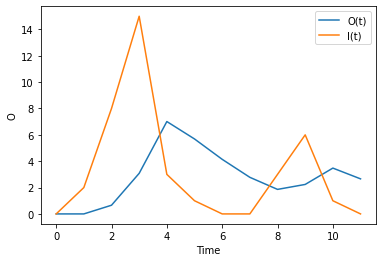

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Load input data from file
df = pd.read_csv('/content/drive/My Drive/input_data.csv')

# Extract I values from the input data
I = df['I'].values
# Define the function dS/dt = I(t) - O(t)
def dSdt(S, t, I, K):
    return I[int(t)] - K*S[0]

# Initial condition for S
S0 = [0]

# Time points to solve for
t = np.linspace(0, len(I)-1, len(I))

# Define the value of K
K = 0.4
#K = df['K'].values[0]

# Solve the differential equation
S = odeint(dSdt, S0, t, args=(I, K))

# Calculate O based on the assumption O=KS
O = K*S.flatten()

# Add the calculated O values to the input data and write to file
df['O'] = O
df["S"] = S
df.to_csv('/content/drive/My Drive/input_data.csv', index=False)

# Plot the results
plt.plot(t, O, label='O(t)')
plt.plot(t, I, label='I(t)')
plt.xlabel('Time')
plt.ylabel('O')
plt.legend()
plt.show()

